running instructions:
-download prerequisite datasets listen in data importfile
-run latest data import file
-run this file

In [20]:
# ACF
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [21]:
df_closing_SnP500_39_years_clean = pd.read_csv('data/df_closing_SnP500_39_years_clean.csv', parse_dates = True, index_col = 'Date')

In [22]:
df_closing_SnP500_39_years_clean

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACGL,ACN,ADBE,...,WY,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION
Date,,,,,,,,,,,,,,,,,,,,,
1984-01-02,44.00,24.60,41.70,25.625,35.00,23.625,46.000,21.25,15.17,13.75,...,33.750,13.01,36.750,36.625,8.75,24.25,29.125,29.76,18.25,35.00
1984-01-03,44.00,24.60,41.70,25.625,35.00,23.625,46.000,21.25,15.17,13.75,...,33.750,13.01,36.750,36.625,8.75,24.25,29.125,29.76,18.25,35.00
1984-01-04,44.00,24.60,41.70,27.875,35.00,23.625,47.500,21.25,15.17,13.75,...,34.125,13.01,37.000,37.125,8.75,24.25,29.125,29.76,18.25,35.00
1984-01-05,44.00,24.60,41.70,28.250,35.00,23.625,48.000,21.25,15.17,13.75,...,35.000,13.01,37.250,37.375,8.75,24.25,29.125,29.76,18.25,35.00
1984-01-06,44.00,24.60,41.70,27.750,35.00,23.625,47.875,21.25,15.17,13.75,...,34.750,13.01,37.625,37.375,8.75,24.25,29.125,29.76,18.25,35.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,149.23,12.71,143.28,131.860,163.10,170.010,108.180,63.38,266.09,338.45,...,31.490,80.72,70.930,108.680,31.83,109.73,128.900,126.69,248.22,48.45
2022-12-27,149.55,12.53,145.02,130.030,162.99,169.000,108.570,63.62,265.31,335.09,...,31.470,84.33,71.570,110.190,32.07,110.72,129.900,127.28,251.00,48.84
2022-12-28,148.09,12.32,145.30,126.040,162.23,167.360,107.830,62.60,263.12,328.33,...,30.630,80.09,70.570,108.380,30.98,108.94,129.310,125.99,246.84,47.97


In [23]:
df_closing_DOW_39_years_clean = pd.read_csv('data/df_closing_DOW_39_years_clean.csv', parse_dates = True, index_col = 'Date')


In [24]:
df_closing_DOW_39_years_clean

,UNH,GS,HD,AMGN,MCD,CAT,MSFT,V,HON,BA,...,MMM,NKE,MRK,DIS,KO,DOW,CSCO,VZ,WBA,INTC
Date,,,,,,,,,,,,,,,,,,,,,
1984-01-02,4.688,70.375,25.25,7.250,69.625,45.875,28.00,56.50,55.625,44.000,...,82.250,14.875,90.375,52.625,53.250,49.80,22.25,67.125,37.750,40.750
1984-01-03,4.688,70.375,25.25,7.250,69.625,45.875,28.00,56.50,55.625,44.000,...,82.250,14.875,90.375,52.625,53.250,49.80,22.25,67.125,37.750,40.750
1984-01-04,4.688,70.375,24.50,7.125,70.875,48.750,28.00,56.50,55.125,45.875,...,84.125,15.375,90.250,53.000,54.875,49.80,22.25,69.125,37.625,41.125
1984-01-05,4.688,70.375,26.00,7.500,72.250,49.000,28.00,56.50,55.625,47.750,...,84.875,15.875,91.500,53.250,55.250,49.80,22.25,69.750,37.750,43.000
1984-01-06,4.688,70.375,25.75,8.000,72.250,48.625,28.00,56.50,54.500,47.625,...,84.625,16.375,91.125,52.750,54.625,49.80,22.25,71.000,37.875,42.750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,531.310,345.510,318.73,263.920,267.570,239.870,238.73,205.83,213.870,189.060,...,120.140,116.250,111.860,88.010,63.820,50.86,47.48,38.410,38.630,26.090
2022-12-27,531.990,341.970,319.55,263.390,266.840,243.140,236.96,206.29,214.890,189.400,...,120.220,117.560,112.120,86.370,64.210,51.19,47.53,39.250,38.310,25.940
2022-12-28,528.450,340.870,315.73,261.420,265.110,239.380,234.53,204.99,212.190,188.380,...,118.290,114.980,111.080,84.170,63.570,49.99,47.07,38.810,37.580,25.540


In [25]:
df_closing_DOW_39_years_clean

,UNH,GS,HD,AMGN,MCD,CAT,MSFT,V,HON,BA,...,MMM,NKE,MRK,DIS,KO,DOW,CSCO,VZ,WBA,INTC
Date,,,,,,,,,,,,,,,,,,,,,
1984-01-02,4.688,70.375,25.25,7.250,69.625,45.875,28.00,56.50,55.625,44.000,...,82.250,14.875,90.375,52.625,53.250,49.80,22.25,67.125,37.750,40.750
1984-01-03,4.688,70.375,25.25,7.250,69.625,45.875,28.00,56.50,55.625,44.000,...,82.250,14.875,90.375,52.625,53.250,49.80,22.25,67.125,37.750,40.750
1984-01-04,4.688,70.375,24.50,7.125,70.875,48.750,28.00,56.50,55.125,45.875,...,84.125,15.375,90.250,53.000,54.875,49.80,22.25,69.125,37.625,41.125
1984-01-05,4.688,70.375,26.00,7.500,72.250,49.000,28.00,56.50,55.625,47.750,...,84.875,15.875,91.500,53.250,55.250,49.80,22.25,69.750,37.750,43.000
1984-01-06,4.688,70.375,25.75,8.000,72.250,48.625,28.00,56.50,54.500,47.625,...,84.625,16.375,91.125,52.750,54.625,49.80,22.25,71.000,37.875,42.750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,531.310,345.510,318.73,263.920,267.570,239.870,238.73,205.83,213.870,189.060,...,120.140,116.250,111.860,88.010,63.820,50.86,47.48,38.410,38.630,26.090
2022-12-27,531.990,341.970,319.55,263.390,266.840,243.140,236.96,206.29,214.890,189.400,...,120.220,117.560,112.120,86.370,64.210,51.19,47.53,39.250,38.310,25.940
2022-12-28,528.450,340.870,315.73,261.420,265.110,239.380,234.53,204.99,212.190,188.380,...,118.290,114.980,111.080,84.170,63.570,49.99,47.07,38.810,37.580,25.540


#Chat GPT about ACF plotting hurst exponent

The autocorrelation function (ACF) measures the correlation of a time series with its own lagged values. The exponent of the absolute returns, also known as Hurst exponent, is a measure of the long-term memory of a time series. The Hurst exponent of a time series with persistent behavior (i.e., a series that tends to continue in the same direction) is greater than 0.5, while the exponent of a mean-reverting series is less than 0.5.

The exponent of the squared returns is also called the volatility of the time series, which measures the degree of variation of a time series over time. If the volatility is high, it means the time series fluctuates a lot, and if it is low, it means the time series is relatively stable.

The exponent of absolute returns and squared returns are related but different measure and they convey different information about the underlying process of the time series.


The Hurst exponent, also known as the exponent of absolute returns, is a measure of the long-term memory of a time series. It quantifies the degree of persistence or anti-persistence in the data, and is calculated by fitting the autocorrelation function of the time series to a power-law function.

A value of the Hurst exponent greater than 0.5 indicates that the time series has persistent behavior, meaning that it tends to continue in the same direction over time. This is often seen in trending data, such as stock prices that have a strong upward or downward trend.

On the other hand, a value of the Hurst exponent less than 0.5 indicates that the time series has mean-reverting behavior, meaning that it tends to move back toward its mean over time. This is often seen in data that is affected by random fluctuations, such as financial market data.

The exponent of squared returns, also called volatility, measures the degree of variation of a time series over time. If the volatility is high, it means the time series fluctuates a lot, and if it is low, it means the time series is relatively stable. For example, a stock price with high volatility will fluctuate greatly in a short period of time, while a stock price with low volatility will fluctuate less in the same period of time.

In short, Hurst exponent is a measure of long term trend and persistence, while the exponent of squared returns is a measure of volatility. Both are important when analyzing a time series and can give insight into different aspects of the underlying process generating the data.

In [26]:
df_closing_DOW_39_years_clean.columns

Index(['UNH', 'GS', 'HD', 'AMGN', 'MCD', 'CAT', 'MSFT', 'V', 'HON', 'BA',
       'TRV', 'CVX', 'JNJ', 'AXP', 'PG', 'CRM', 'IBM', 'WMT', 'JPM', 'AAPL',
       'MMM', 'NKE', 'MRK', 'DIS', 'KO', 'DOW', 'CSCO', 'VZ', 'WBA', 'INTC'],
      dtype='object')

In [27]:
returns = df_closing_DOW_39_years_clean.pct_change().dropna()
abs_returns = returns.abs()
squared_returns = returns

In [28]:
abs_returns

,UNH,GS,HD,AMGN,MCD,CAT,MSFT,V,HON,BA,...,MMM,NKE,MRK,DIS,KO,DOW,CSCO,VZ,WBA,INTC
Date,,,,,,,,,,,,,,,,,,,,,
1984-01-03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1984-01-04,0.000000,0.000000,0.029703,0.017241,0.017953,0.062670,0.000000,0.000000,0.008989,0.042614,...,0.022796,0.033613,0.001383,0.007126,0.030516,0.000000,0.000000,0.029795,0.003311,0.009202
1984-01-05,0.000000,0.000000,0.061224,0.052632,0.019400,0.005128,0.000000,0.000000,0.009070,0.040872,...,0.008915,0.032520,0.013850,0.004717,0.006834,0.000000,0.000000,0.009042,0.003322,0.045593
1984-01-06,0.000000,0.000000,0.009615,0.066667,0.000000,0.007653,0.000000,0.000000,0.020225,0.002618,...,0.002946,0.031496,0.004098,0.009390,0.011312,0.000000,0.000000,0.017921,0.003311,0.005814
1984-01-09,0.000000,0.000000,0.000000,0.015625,0.029412,0.010283,0.000000,0.000000,0.004587,0.002625,...,0.008863,0.007634,0.010974,0.000000,0.013730,0.000000,0.000000,0.012324,0.023102,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,0.008006,0.000203,0.008256,0.005052,0.006773,0.009809,0.002267,0.003755,0.007348,0.004303,...,0.011925,0.003941,0.005574,0.015461,0.007578,0.013753,0.003381,0.002610,0.004943,0.004621
2022-12-27,0.001280,0.010246,0.002573,0.002008,0.002728,0.013632,0.007414,0.002235,0.004769,0.001798,...,0.000666,0.011269,0.002324,0.018634,0.006111,0.006488,0.001053,0.021869,0.008284,0.005749
2022-12-28,0.006654,0.003217,0.011954,0.007479,0.006483,0.015464,0.010255,0.006302,0.012565,0.005385,...,0.016054,0.021946,0.009276,0.025472,0.009967,0.023442,0.009678,0.011210,0.019055,0.015420


C:\Users\Nitai Nijholt\AppData\Local\Temp\ipykernel_27880\4023233967.py:16: RuntimeWarning: invalid value encountered in log
  acf_squared_returns_log = np.log(acf_squared_returns)
C:\Users\Nitai Nijholt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\graphics\utils.py:55: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure()


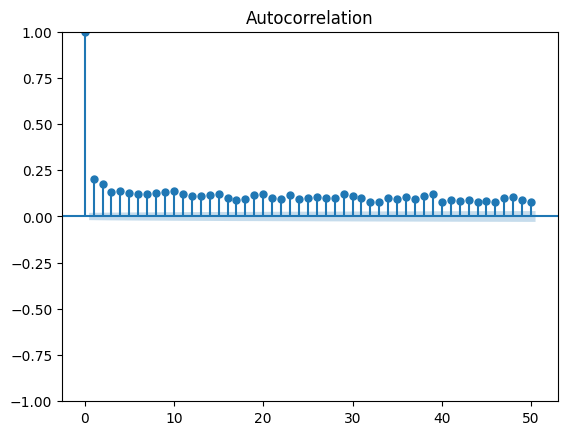

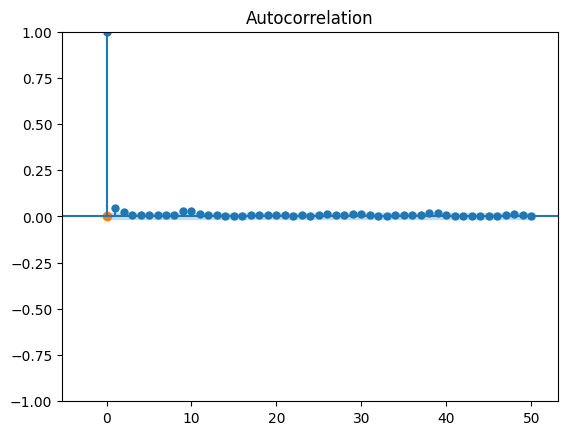

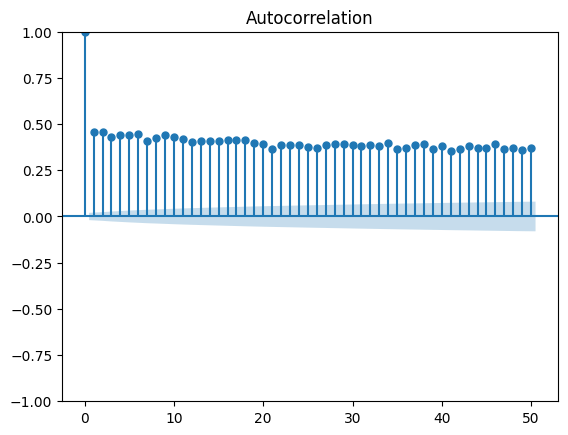

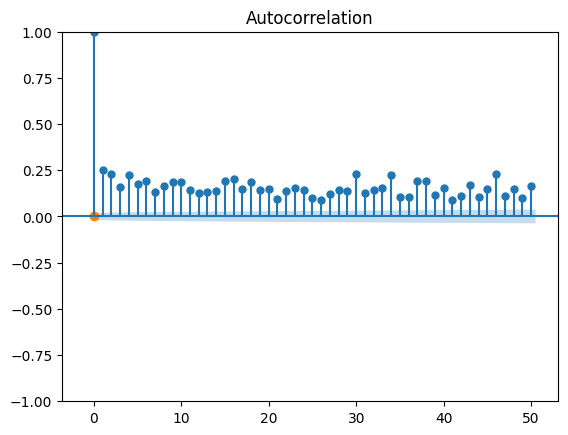

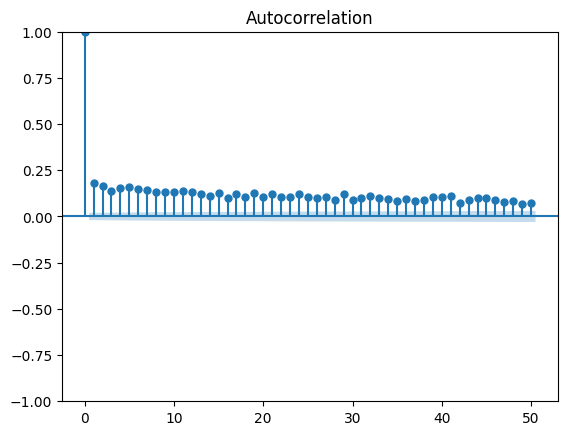

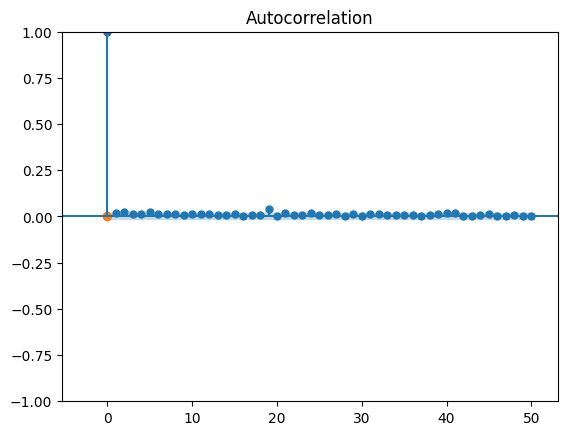

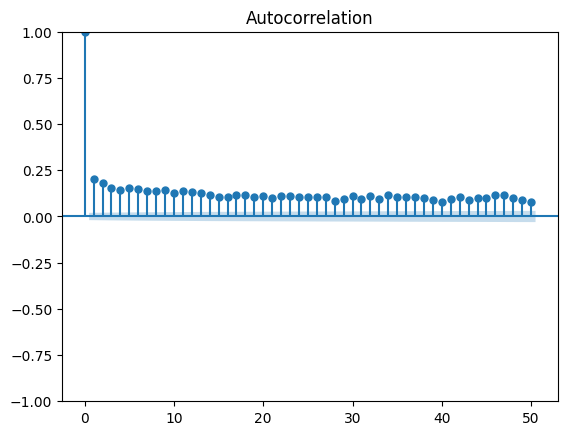

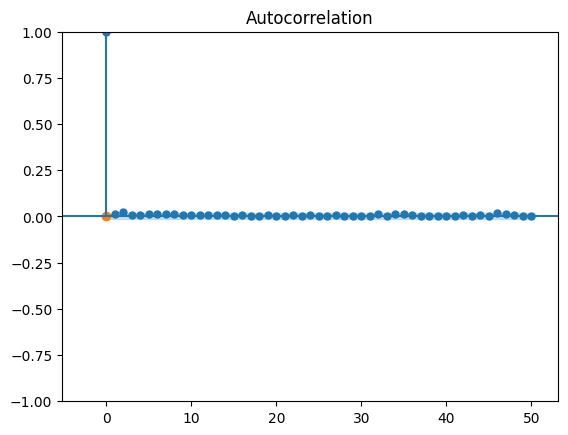

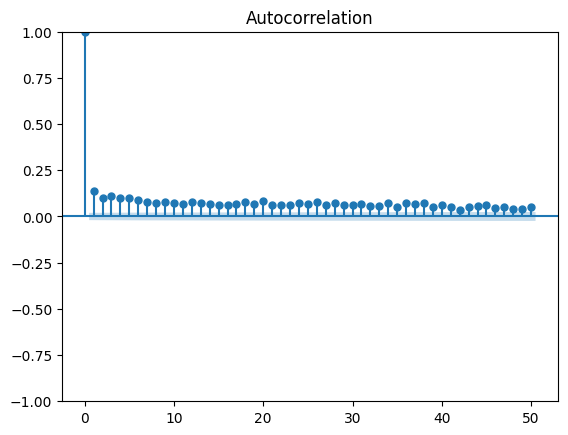

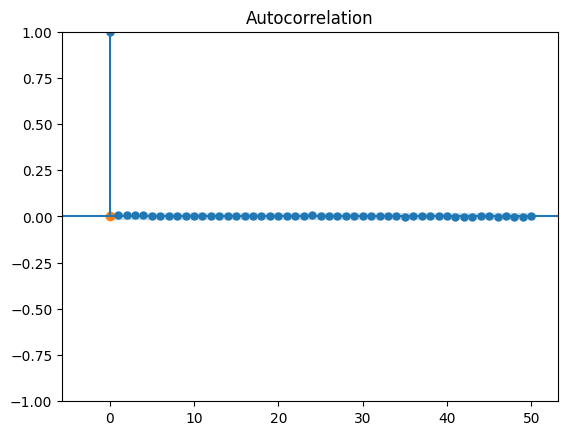

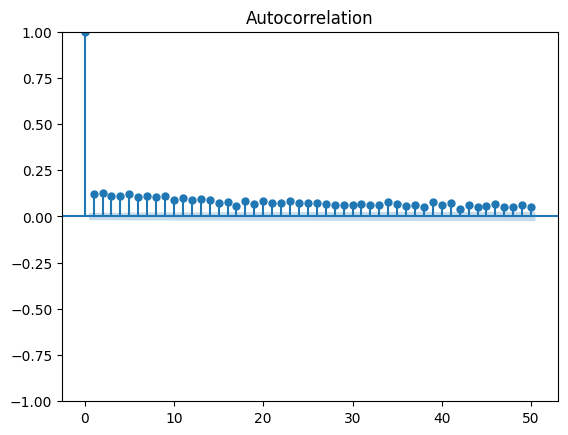

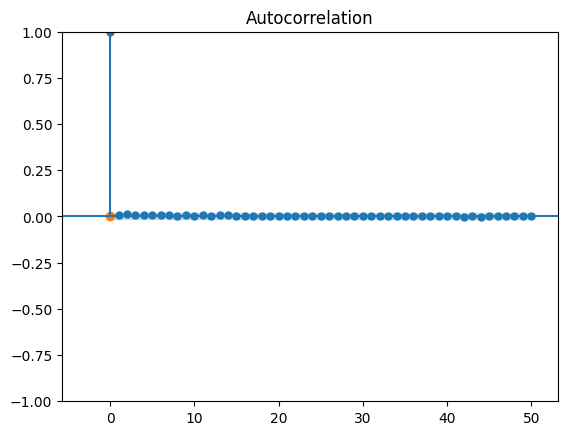

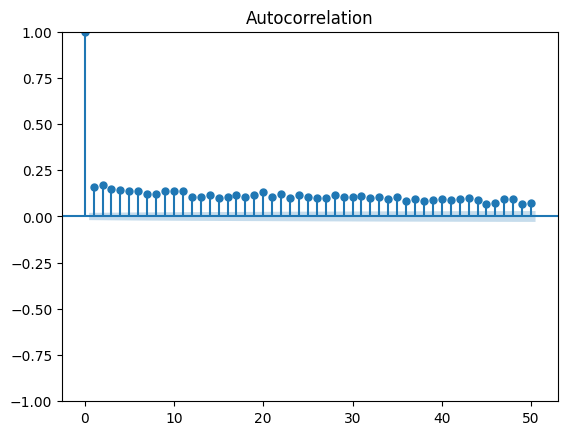

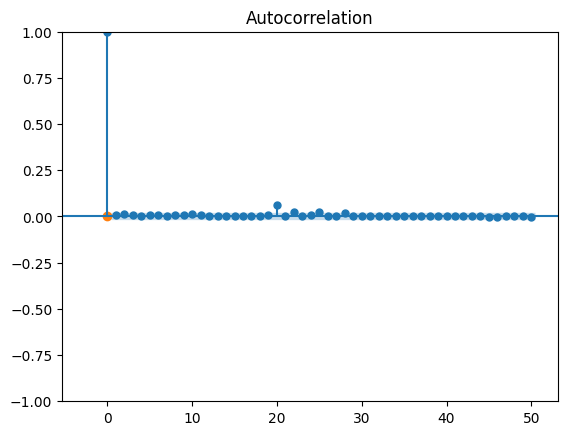

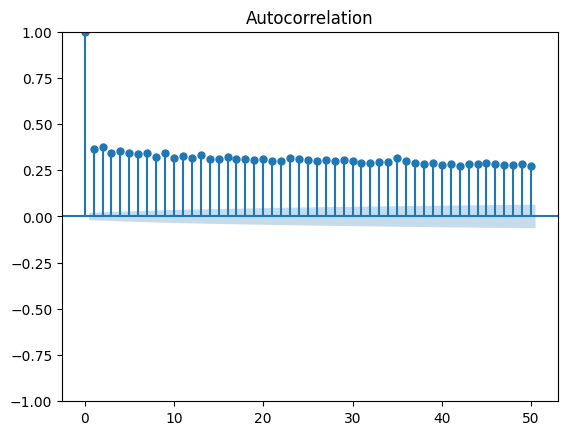

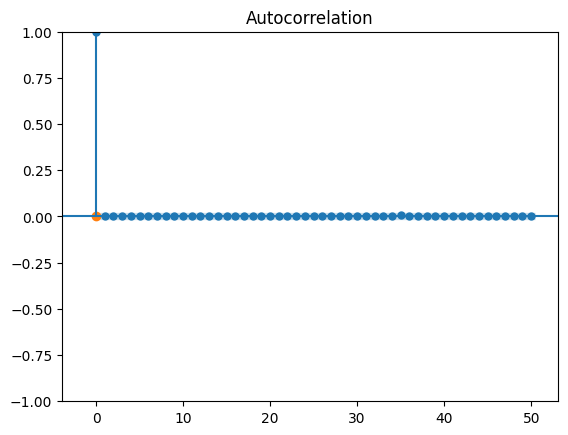

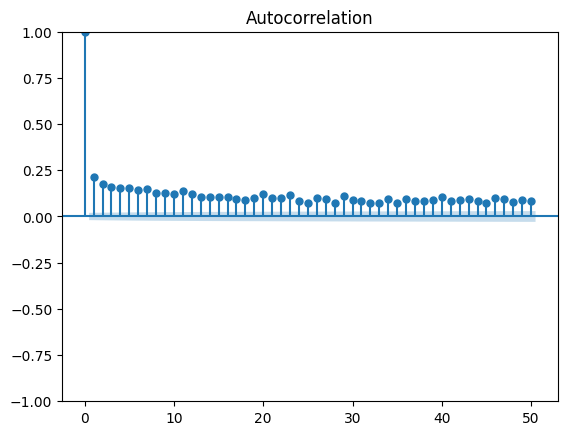

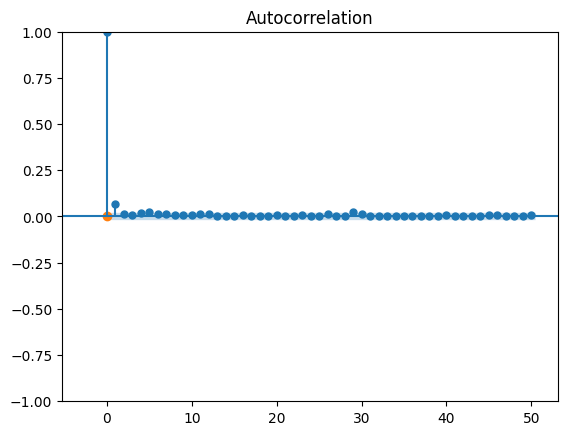

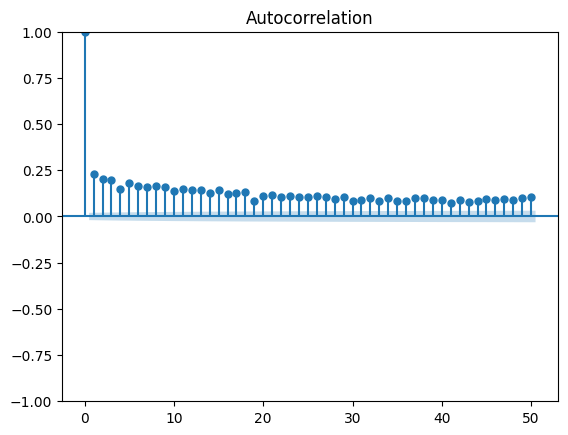

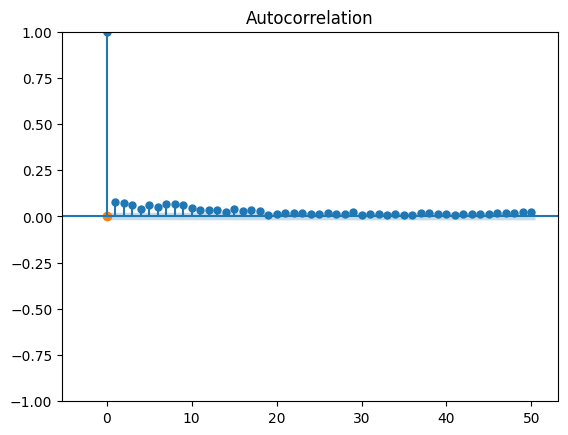

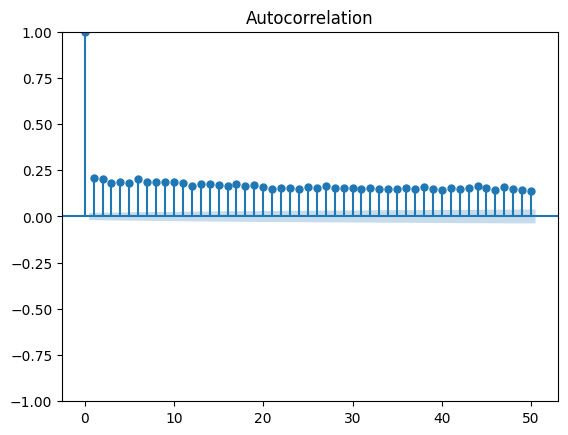

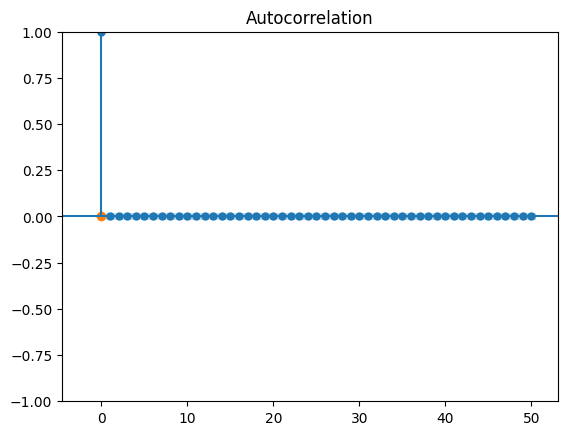

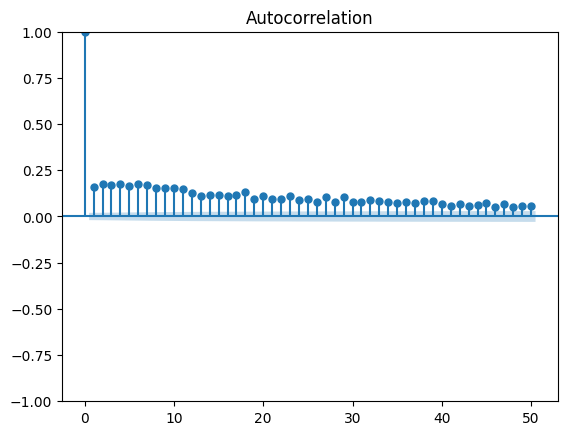

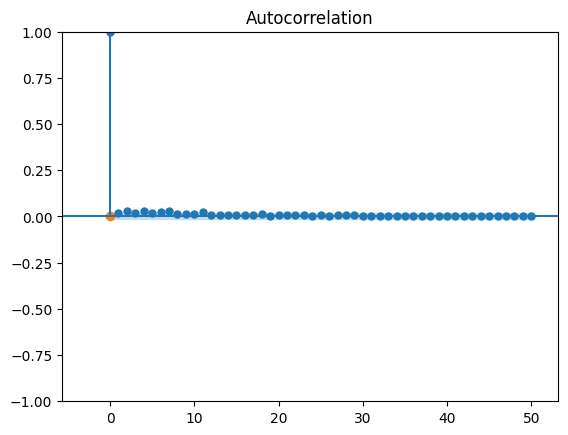

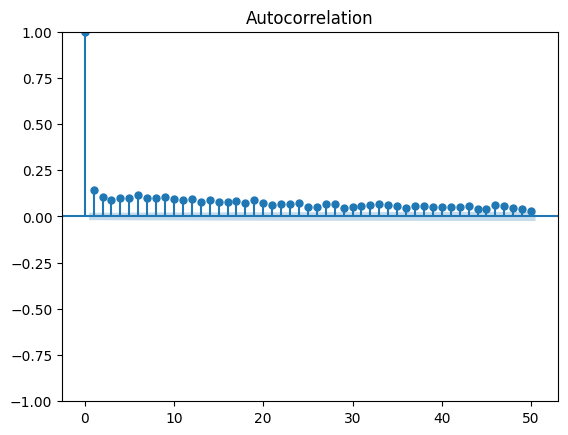

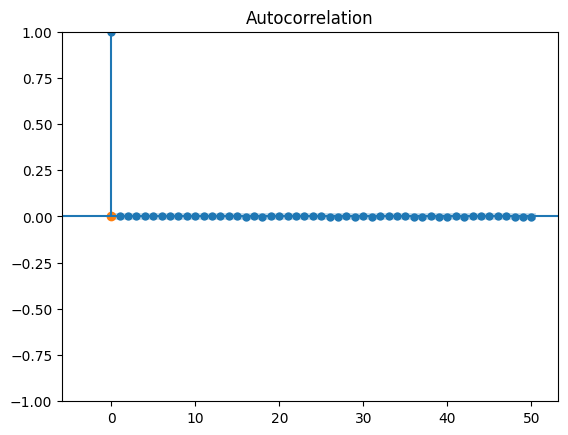

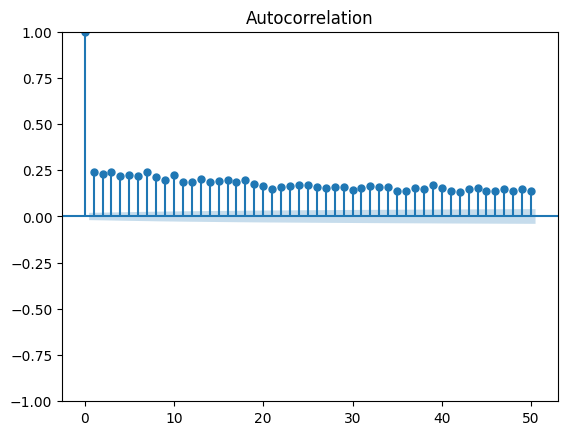

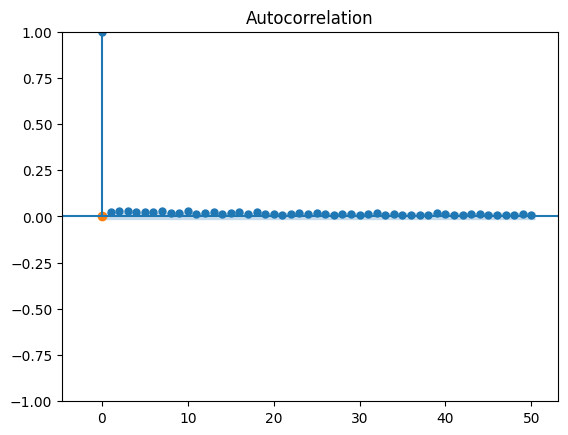

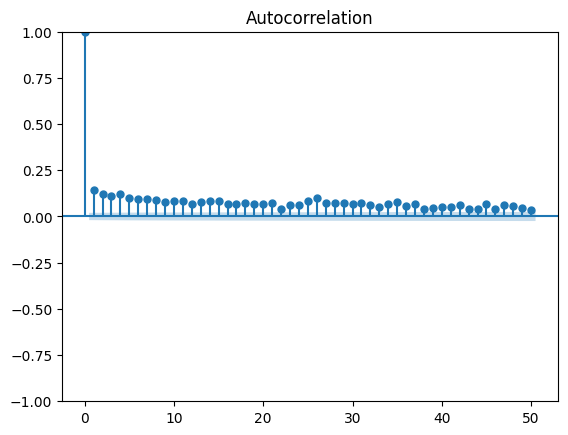

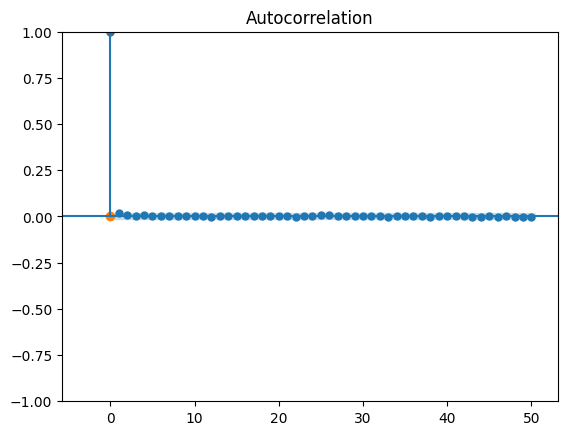

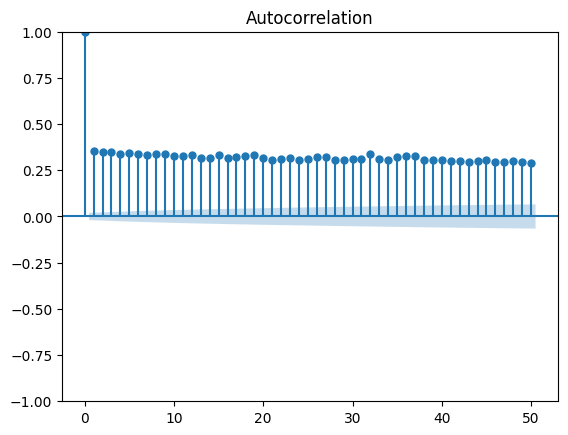

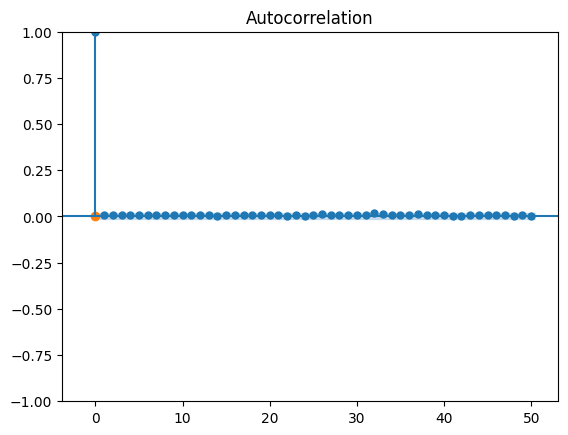

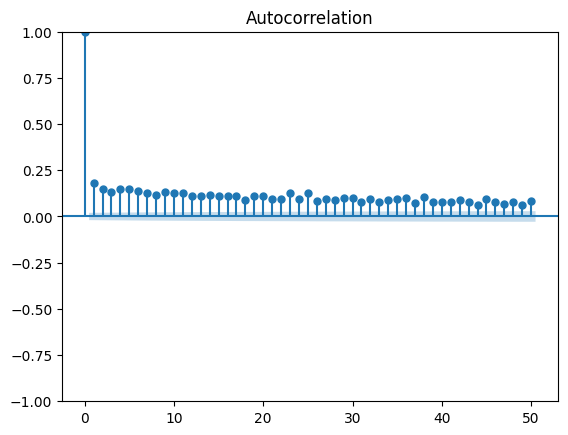

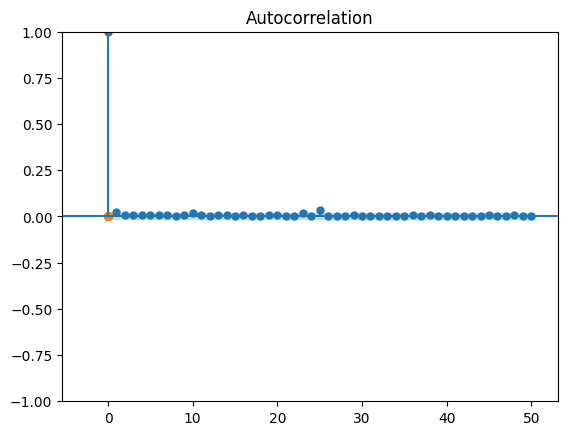

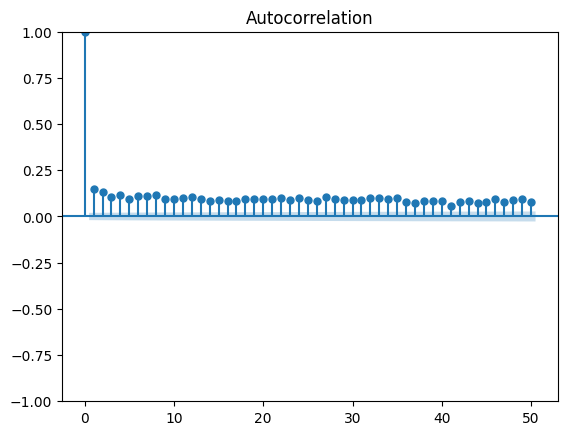

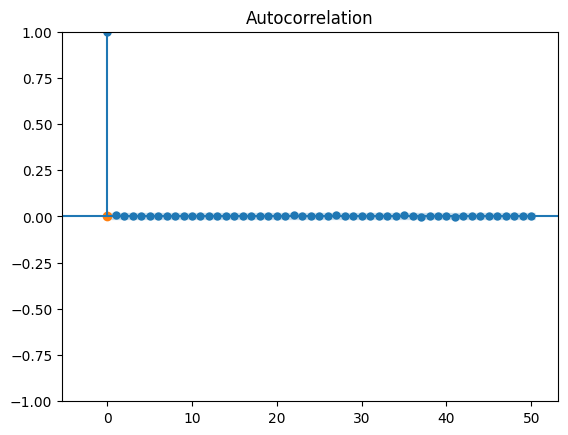

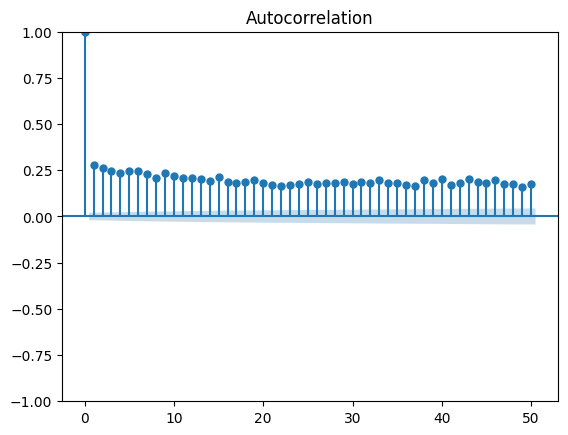

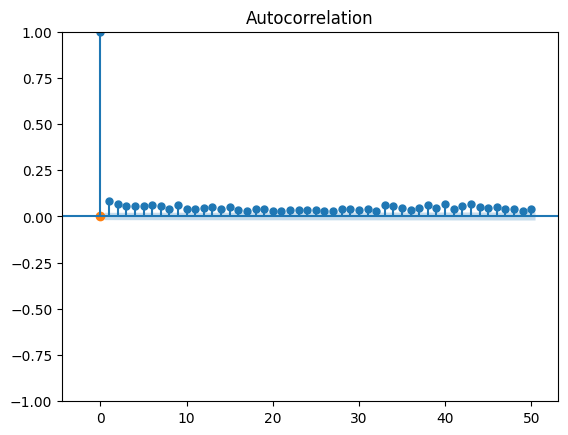

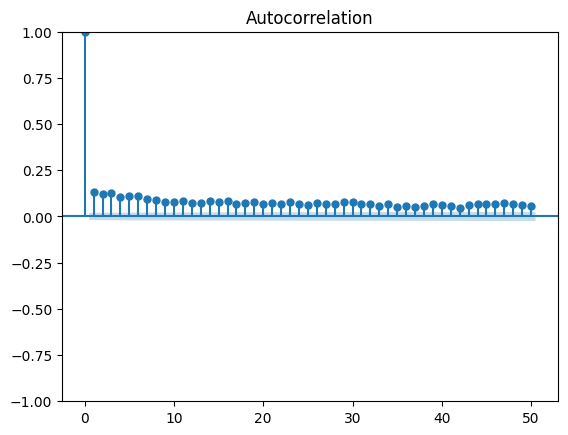

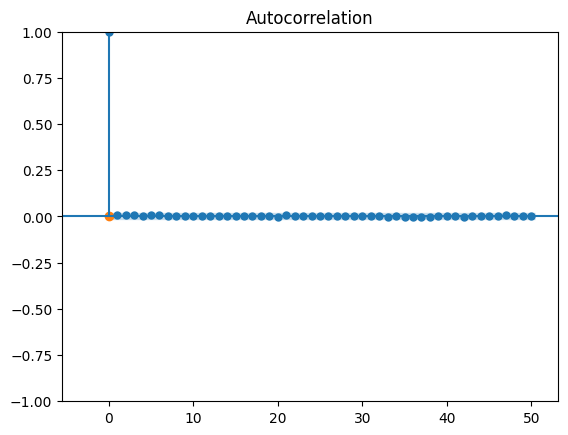

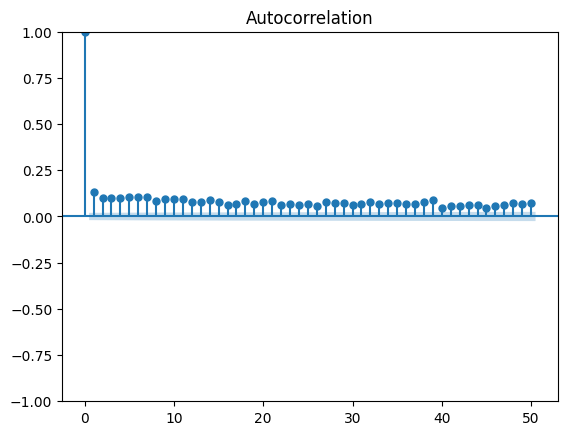

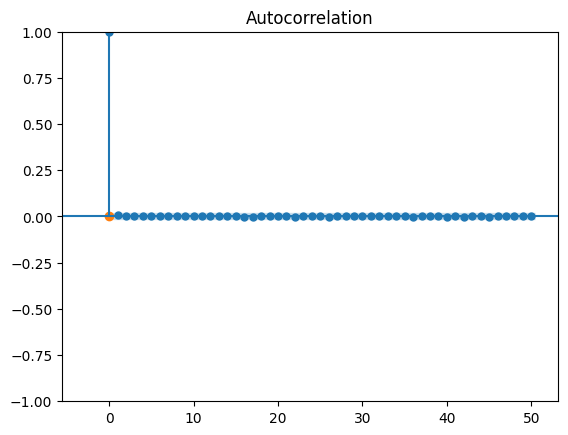

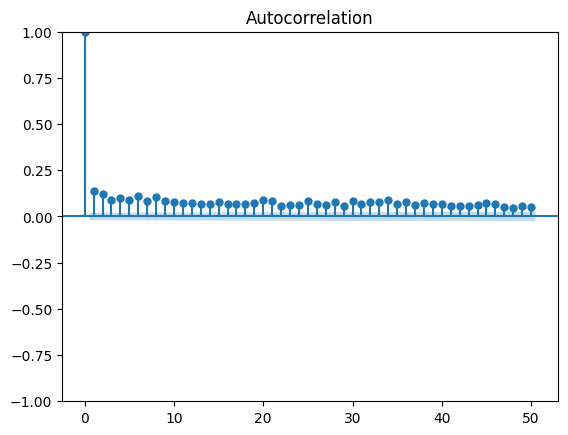

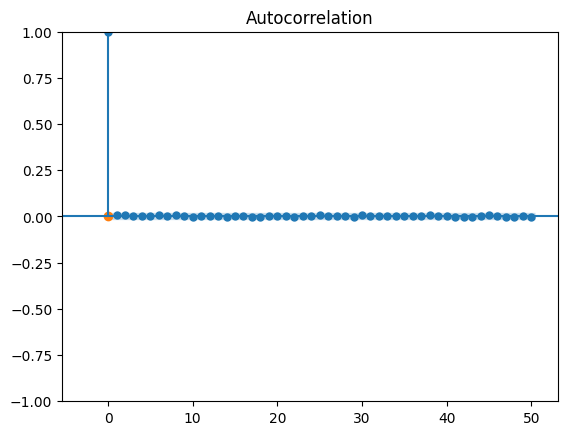

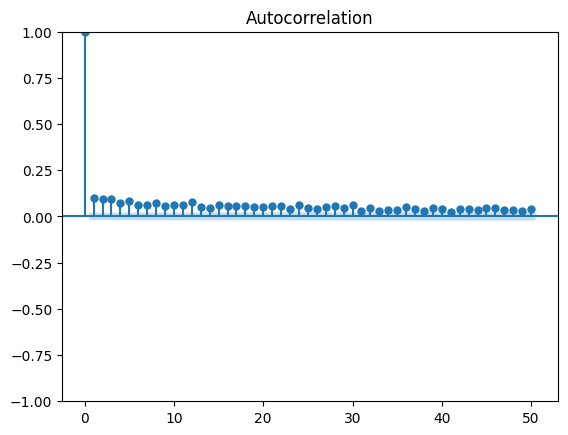

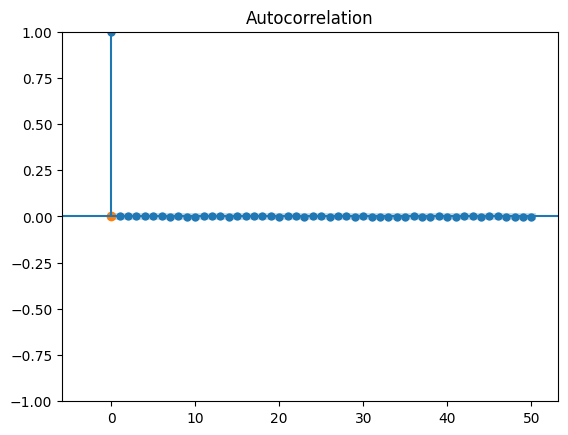

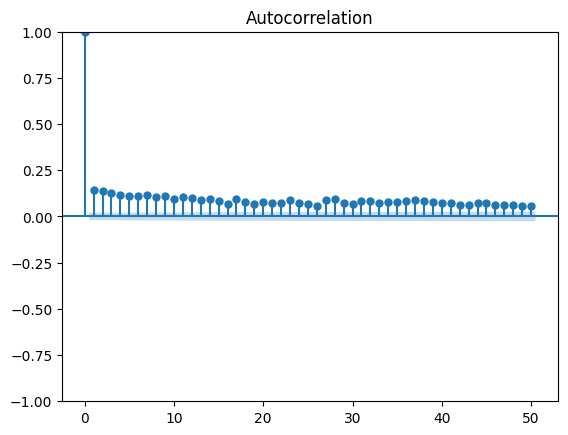

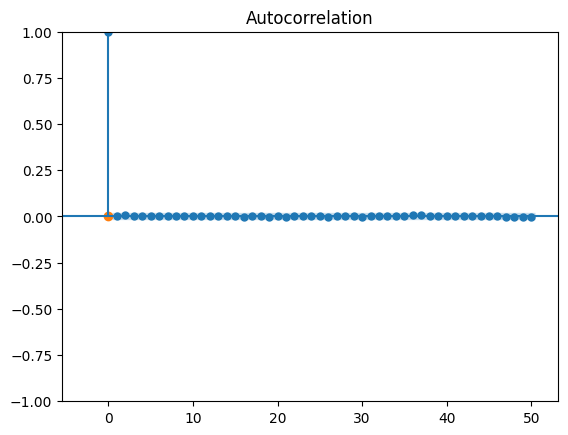

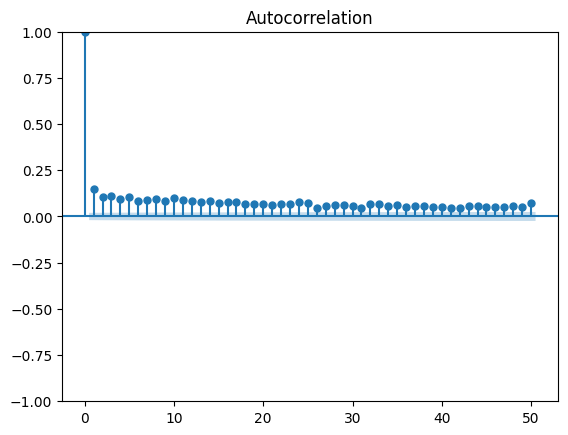

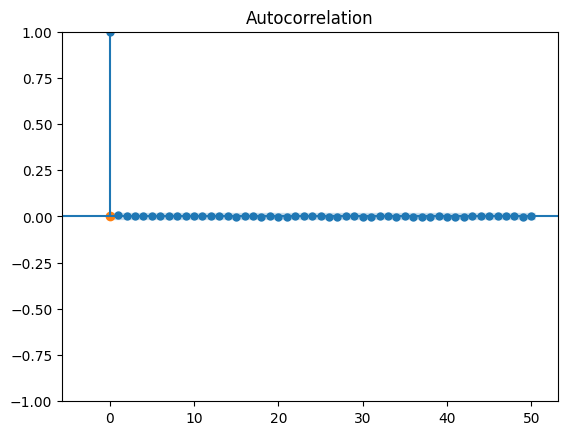

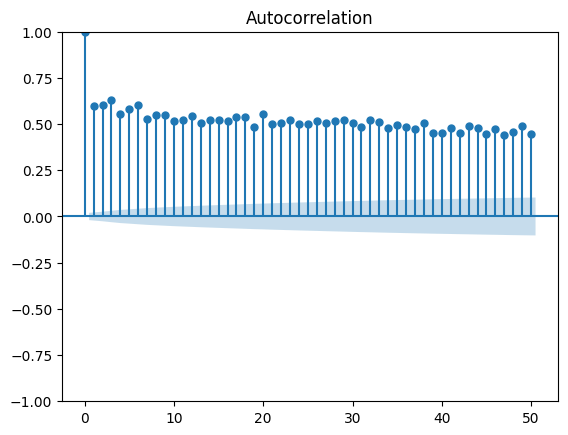

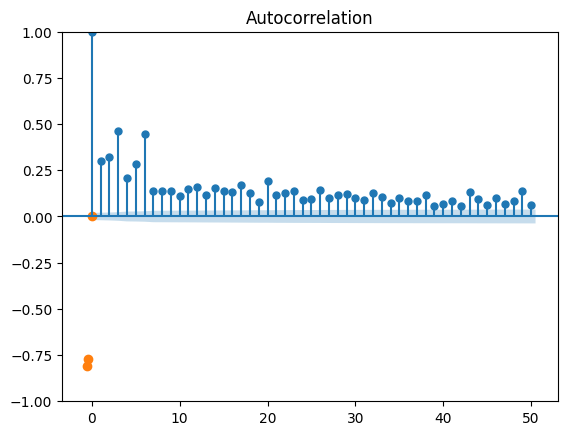

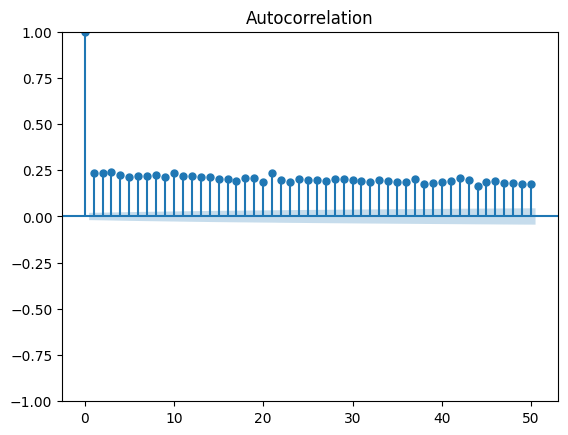

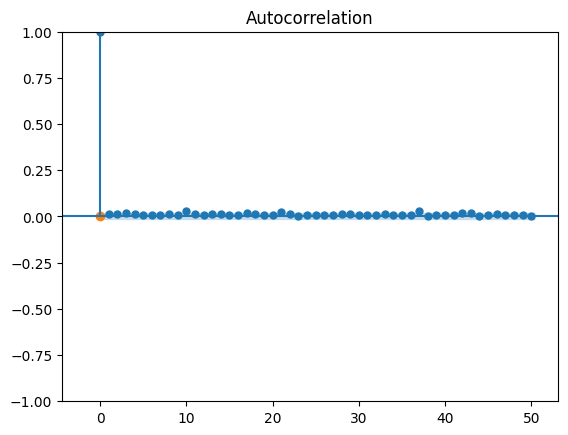

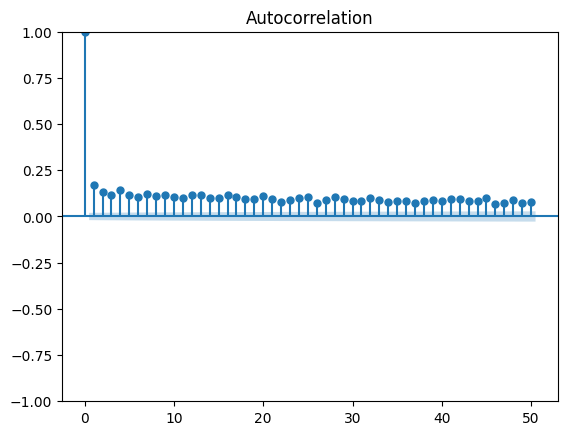

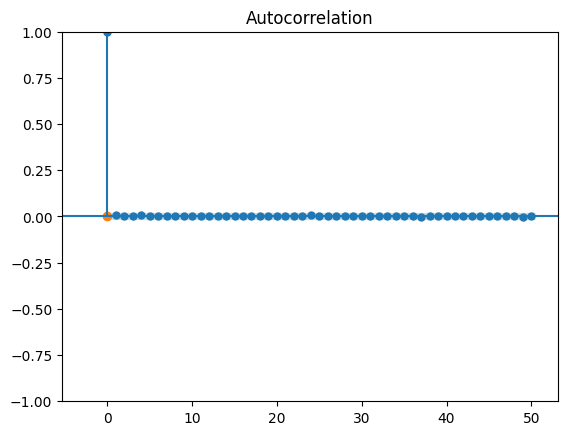

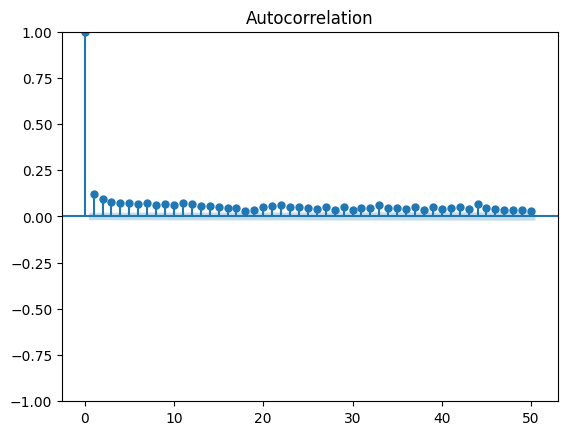

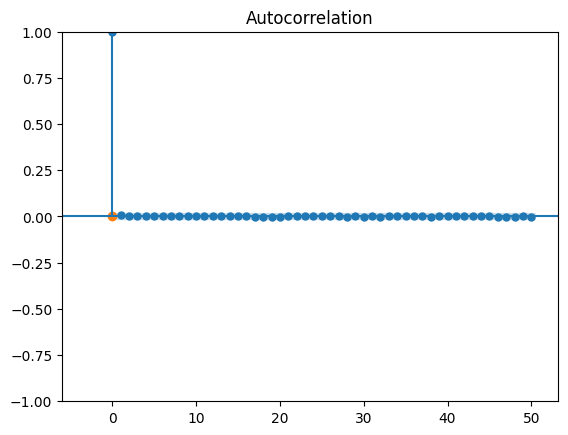

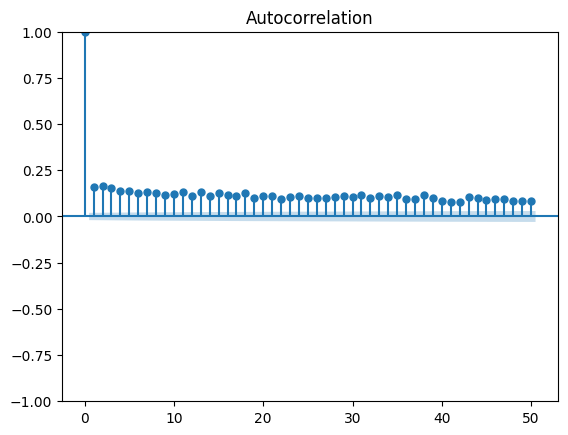

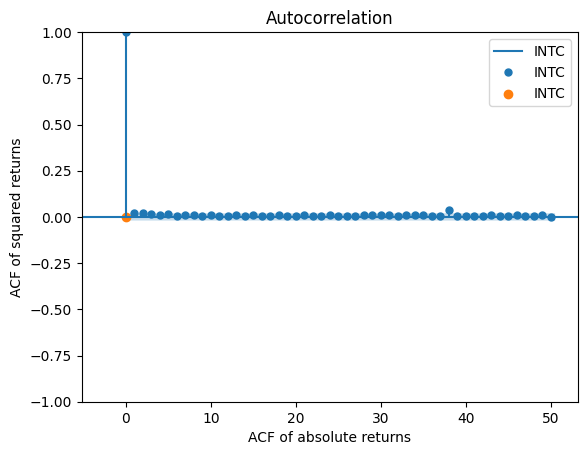

In [35]:
# Plot the ACF v0.1
lags = 50
acf_abs_returns_per_stock = []
acf_squared_returns_per_stock = []
acf_abs_returns_per_stock_log = []
acf_squared_returns_per_stock_log = []
for stock in returns.columns:
    abs_returns = returns[stock].abs()
    squared_returns = np.square(returns[stock])
    plot_acf(abs_returns, lags = lags, label = stock)
    plot_acf(squared_returns, lags = lags, label = stock)
    acf_abs_returns = acf(abs_returns, nlags = lags)
    acf_squared_returns = acf(squared_returns, nlags = lags)
    # plt.scatter(acf_abs_returns, acf_squared_returns, label = stock)
    acf_abs_returns_log = np.log(acf_abs_returns)
    acf_squared_returns_log = np.log(acf_squared_returns)
    plt.scatter(acf_abs_returns_log, acf_squared_returns_log, label = stock)
    acf_abs_returns_per_stock.append(acf_abs_returns)
    acf_squared_returns_per_stock.append(acf_squared_returns)
    acf_abs_returns_per_stock_log.append(acf_abs_returns_log)
    acf_squared_returns_per_stock_log.append(acf_squared_returns_log)
    # exponent = np.polyfit(acf_abs_returns, acf_squared_returns, 1)[0]
    # print(exponent)
plt.legend()
plt.ylabel('ACF of squared returns')
plt.xlabel('ACF of absolute returns')
plt.show()

In [ ]:
acf_abs_returns_per_stock 
acf_squared_returns_per_stock 
acf_abs_returns_per_stock_log 
acf_squared_returns_per_stock_log

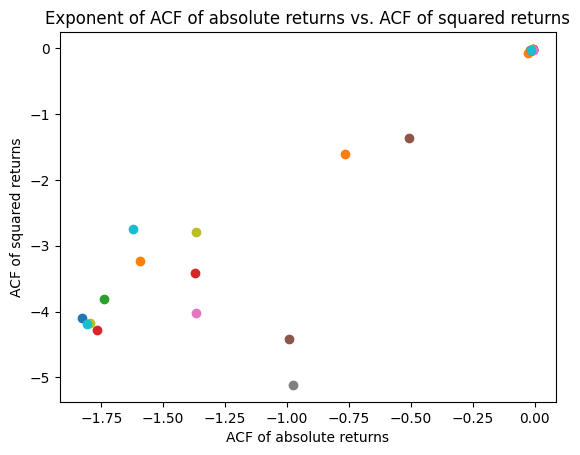

In [49]:
for index in range(len(acf_abs_returns_per_stock_log)):
    # exponent_acf_abs_returns = np.polyfit(range(len(acf_abs_returns_per_stock_log[index]), acf_abs_returns_per_stock_log[index],1))
    # exponent_acf_squared_returns = np.polyfit(range(len(acf_squared_returns_per_stock_log[index]), acf_squared_returns_per_stock_log[index],1))

    exponent_acf_abs_returns = np.polyfit(range(len(acf_abs_returns_per_stock_log[index])), acf_abs_returns_per_stock_log[index],1)
    exponent_acf_squared_returns = np.polyfit(range(len(acf_squared_returns_per_stock_log[index])), acf_squared_returns_per_stock_log[index],1)
    plt.scatter(exponent_acf_abs_returns,exponent_acf_squared_returns, label = returns.columns[index])
plt.xlabel('ACF of absolute returns')
plt.ylabel('ACF of squared returns')
plt.title('Exponent of ACF of absolute returns vs. ACF of squared returns')
plt.show()


# Code below is not probably needed anymore, but kept as backup

0.9187862739252767


C:\Users\Nitai Nijholt\AppData\Local\Temp\ipykernel_10140\1291421886.py:9: RuntimeWarning: invalid value encountered in log
  acf_squared_returns_log = np.log(acf_squared_returns)


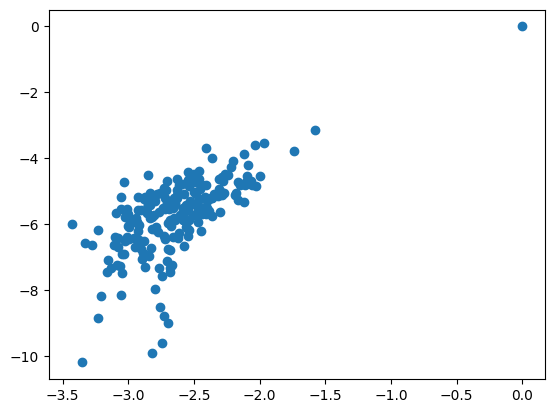

1.076331475575221


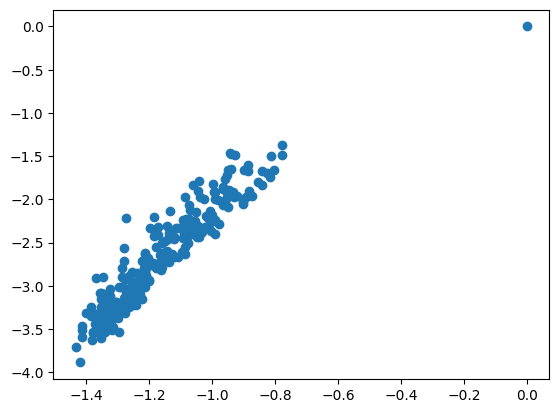

0.9219354043031435


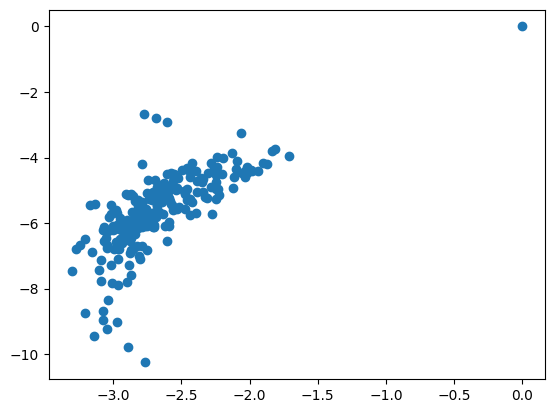

0.9853760404687901


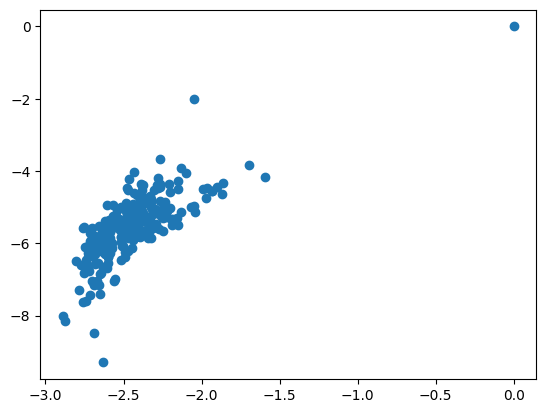

0.9574229031975985


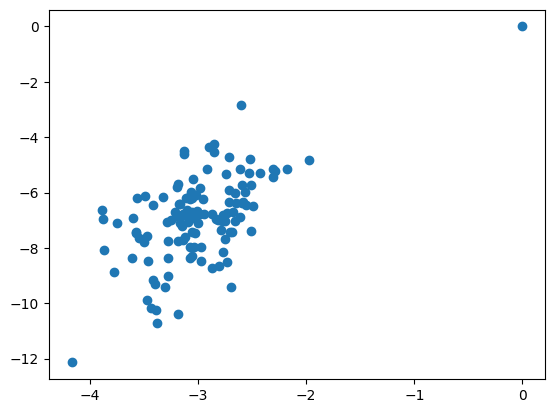

0.8937982467342124


C:\Users\Nitai Nijholt\AppData\Local\Temp\ipykernel_10140\1291421886.py:8: RuntimeWarning: invalid value encountered in log
  acf_abs_returns_log = np.log(acf_abs_returns)


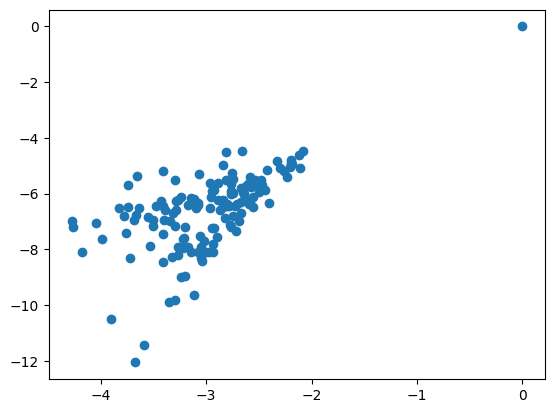

0.9486702644907229


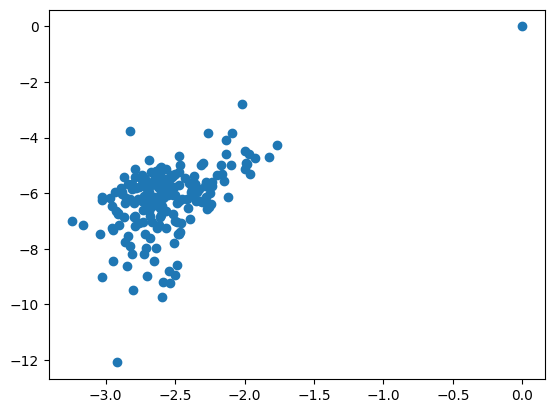

0.7518906555626237


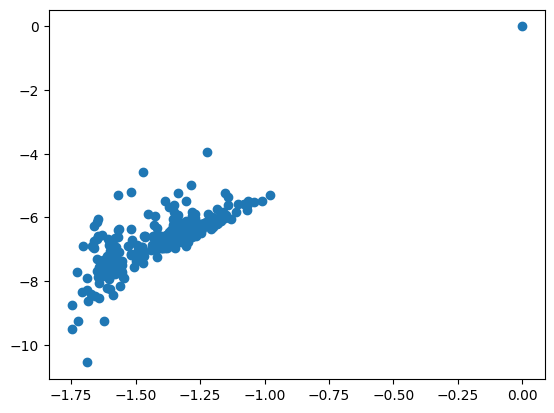

0.8957718247198607


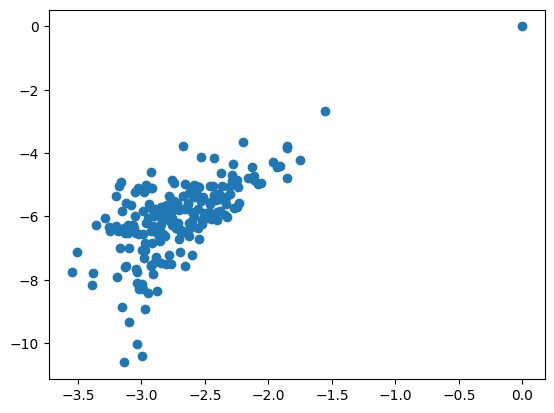

0.8648333386613593


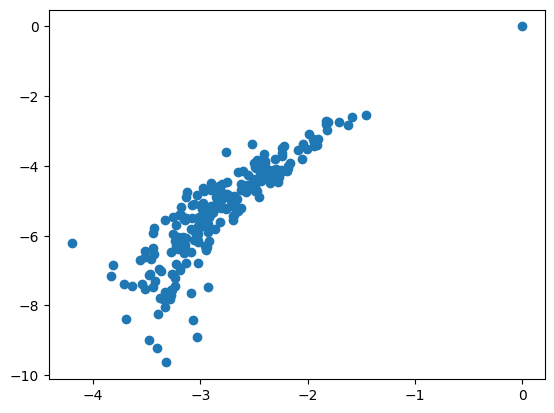

0.9240869457905991


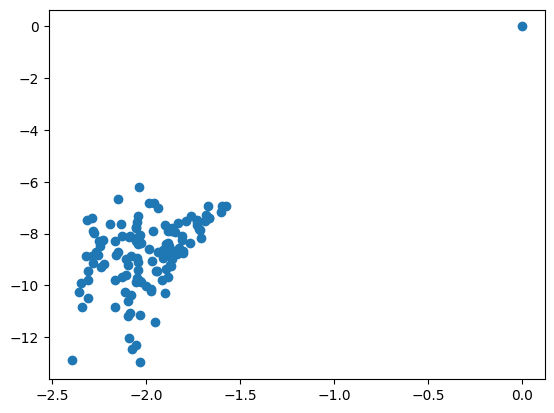

0.7787834274921165


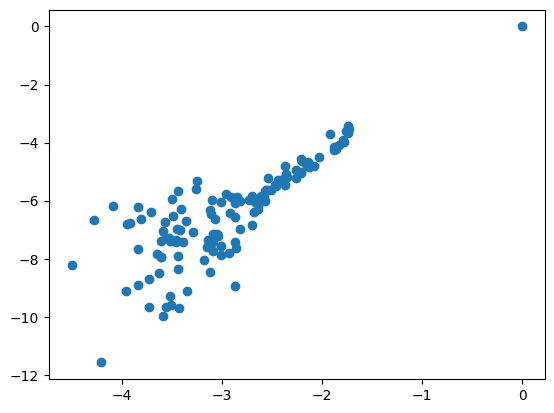

0.9573847518110253


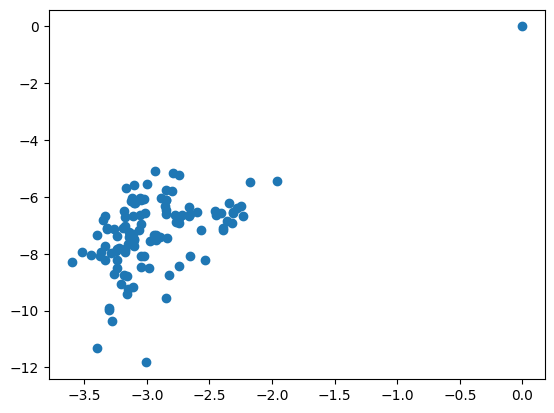

0.7355053794102391


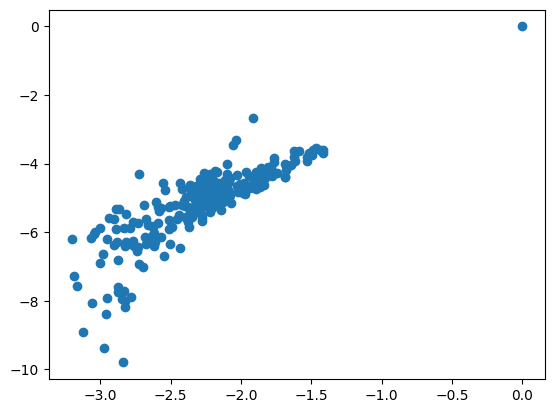

0.954313177326915


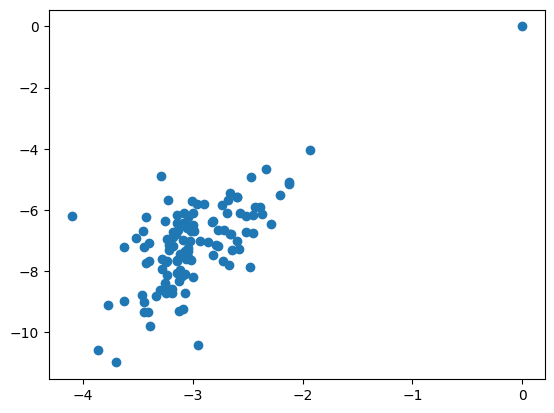

1.0428673467226557


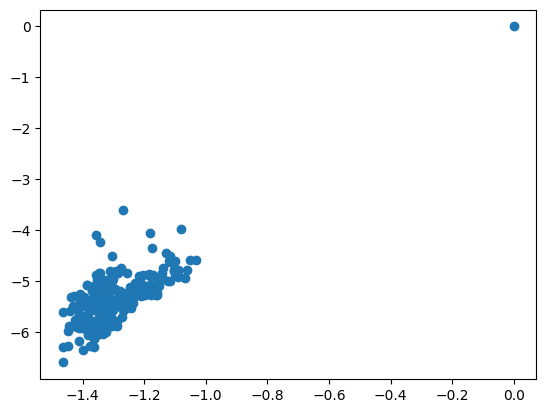

0.9178561939650348


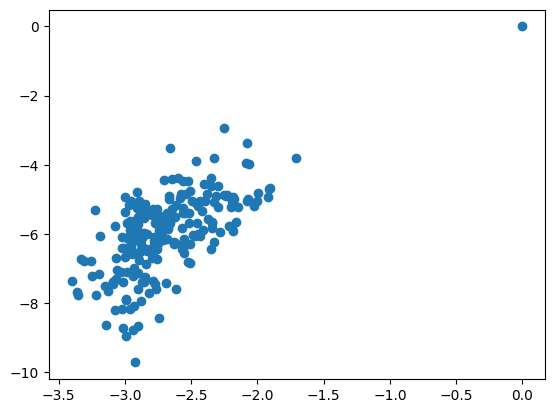

0.9831054677698752


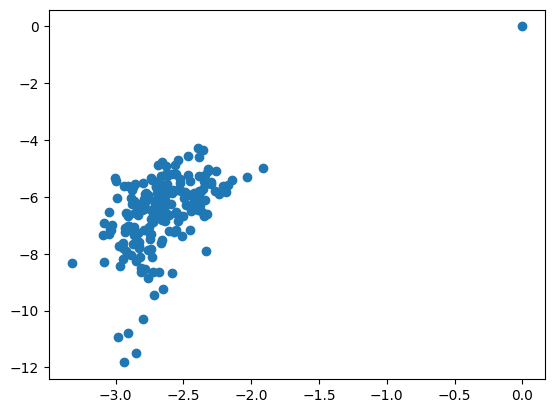

0.7159025013959256


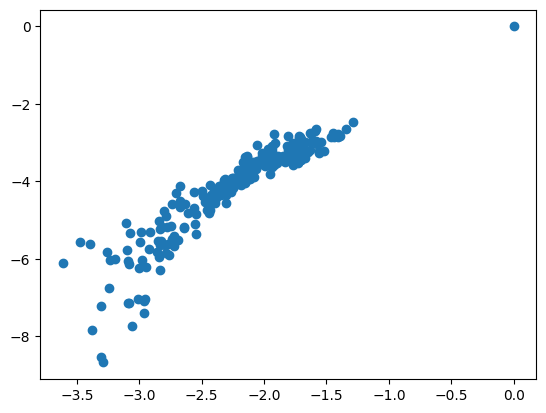

0.9951447376569429


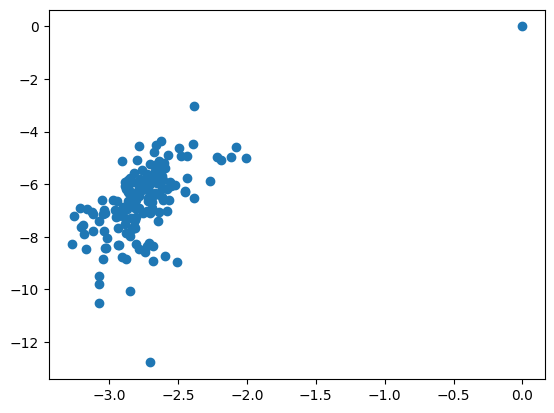

0.9171405972105996


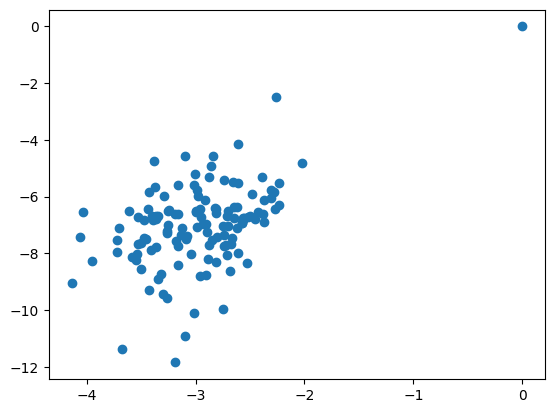

0.960909108639053


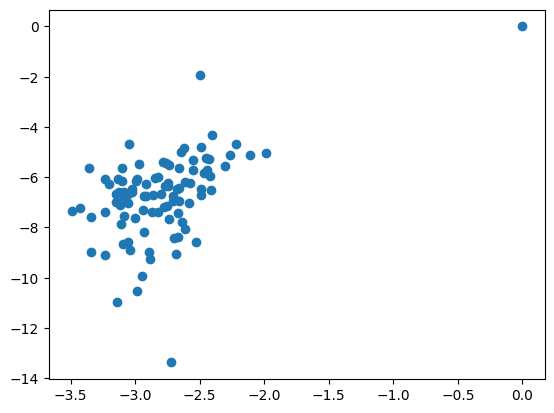

0.9707399363559664


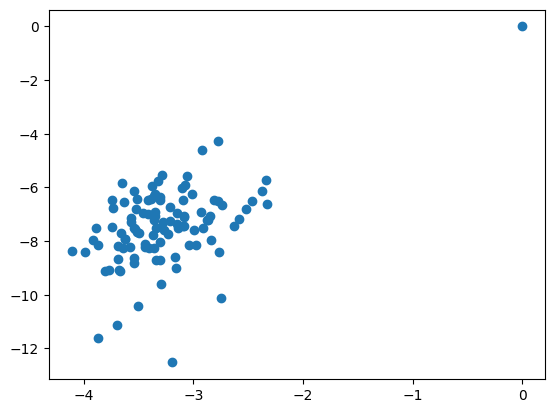

0.8949335202064086


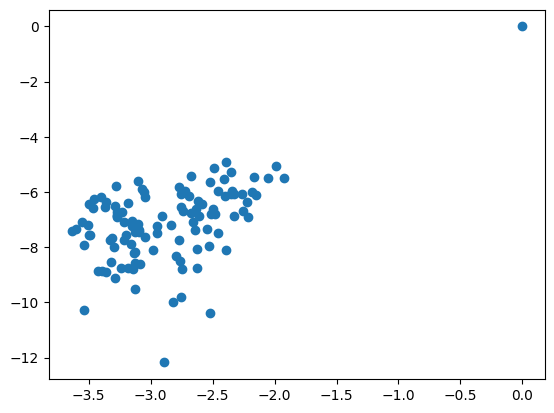

0.9618950570259441


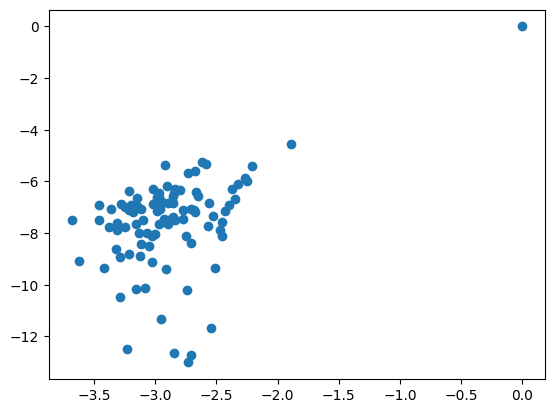

1.0216021163294575


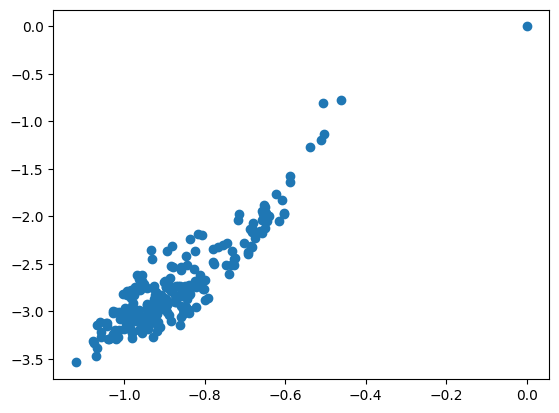

1.0157417939642304


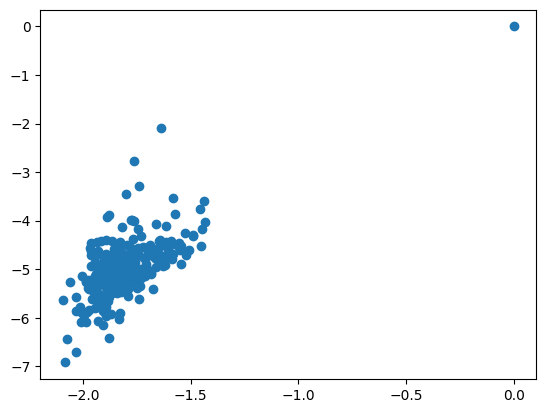

0.9160780588316062


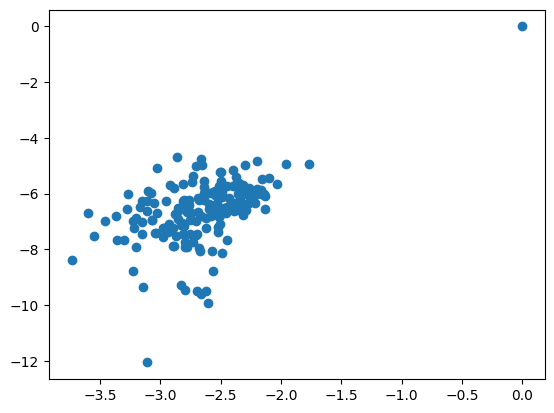

0.9577682718972446


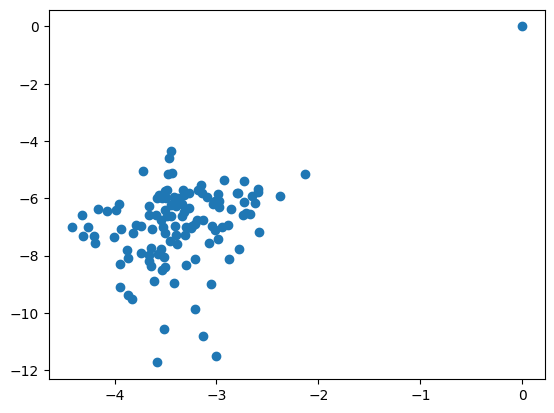

0.963374270975338


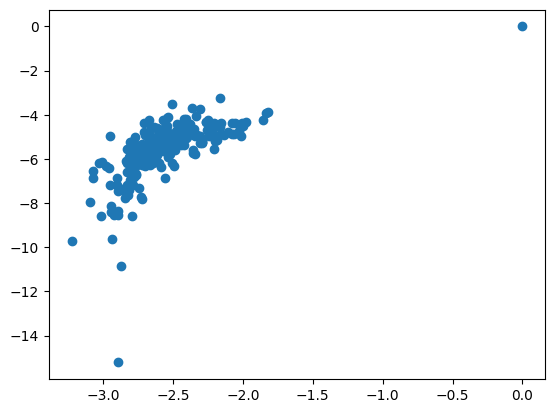

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


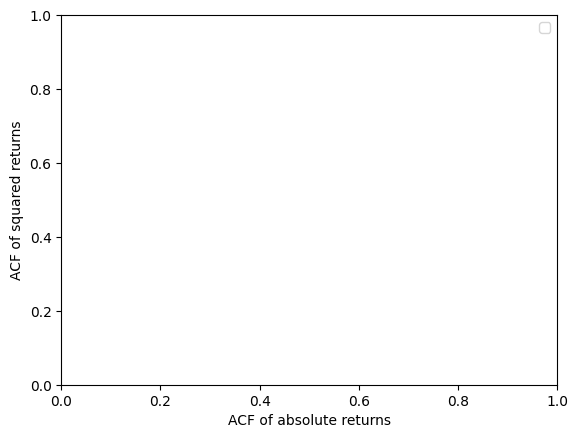

In [ ]:
# Plot the ACF v1.0
# plotting ACF of absolute returns vs ACF of squared returns
for stock in returns.columns:
    abs_returns = returns[stock].abs()
    squared_returns = np.square(returns[stock])
    acf_abs_returns = acf(abs_returns, nlags = 250)
    acf_squared_returns = acf(squared_returns, nlags = 250)
    # plt.scatter(acf_abs_returns, acf_squared_returns, label = stock)
    acf_abs_returns_log = np.log(acf_abs_returns)
    acf_squared_returns_log = np.log(acf_squared_returns)
    plt.scatter(acf_abs_returns_log, acf_squared_returns_log, label = stock)
    exponent = np.polyfit(acf_abs_returns, acf_squared_returns, 1)[0]
    print(exponent)
plt.show()
plt.legend()
plt.ylabel('ACF of squared returns')
plt.xlabel('ACF of absolute returns')
plt.show()

In [ ]:
stock = 'AMGN'
abs_returns = returns[stock].abs()
squared_returns = np.square(returns[stock])
acf_abs_returns = acf(abs_returns, nlags = 250)
acf_squared_returns = acf(squared_returns, nlags = 250)
x_abs = np.log(range(len(acf_abs_returns))).reshape(-1, 1)
x_abs = x_abs[~np.isinf(x_abs)]
x_abs = x_abs[~np.isnan(x_abs)]
y_abs = np.log(acf_abs_returns).reshape(-1, 1)
y_abs = y_abs[~np.isinf(y_abs)]
y_abs = y_abs[~np.isnan(y_abs)]
# model_abs = LinearRegression.fit(x_abs, y_abs)
x_squared = np.log(range(len(acf_squared_returns))).reshape(-1, 1)
x_squared = x_squared[~np.isinf(x_squared)]
x_squared = x_squared[~np.isnan(x_squared)]
y_squared = np.log(acf_squared_returns).reshape(-1, 1)
y_squared = y_squared[~np.isinf(y_squared)]
y_squared = x_squared[~np.isnan(x_squared)]

C:\Users\Nitai Nijholt\AppData\Local\Temp\ipykernel_10140\99769890.py:6: RuntimeWarning: divide by zero encountered in log
  x_abs = np.log(range(len(acf_abs_returns))).reshape(-1, 1)
C:\Users\Nitai Nijholt\AppData\Local\Temp\ipykernel_10140\99769890.py:13: RuntimeWarning: divide by zero encountered in log
  x_squared = np.log(range(len(acf_squared_returns))).reshape(-1, 1)
C:\Users\Nitai Nijholt\AppData\Local\Temp\ipykernel_10140\99769890.py:16: RuntimeWarning: invalid value encountered in log
  y_squared = np.log(acf_squared_returns).reshape(-1, 1)


In [ ]:
y_squared

array([ 0.        , -4.15446967, -3.83369555, -4.63591504, -4.55759909,
       -4.32638723, -4.42925002, -4.47498494, -4.49529999, -4.54006519,
       -4.98277064, -4.74388009, -5.13694927, -4.96758764, -5.14047895,
       -5.64970529, -5.23107121, -5.3009238 , -5.48554142, -5.21633725,
       -5.33619737, -5.54968911, -5.0932921 , -5.49190772, -4.81818805,
       -5.25791726, -5.28884821, -5.11479632, -6.3669422 , -5.3741005 ,
       -5.33643971, -5.66845886, -4.37097264, -5.38640163, -4.50077933,
       -4.43361196, -4.86278788, -5.61415209, -5.86090524, -5.81509922,
       -7.03600452, -5.39969781, -5.02633445, -5.74195258, -5.15888909,
       -5.56157687, -3.91182513, -4.28660532, -5.04609571, -5.61958026,
       -6.45845572, -5.81465005, -4.87530415, -6.99247845, -5.02200822,
       -5.46187361, -5.65568658, -4.77127106, -5.54801462, -5.16887477,
       -5.83825241, -5.68658809, -6.06975231, -6.20579797, -5.97176369,
       -9.29579502, -5.84136465, -8.46917237, -6.21402256, -7.15

C:\Users\Nitai Nijholt\AppData\Local\Temp\ipykernel_27880\2180230213.py:7: RuntimeWarning: divide by zero encountered in log
  x_abs = np.log(range(len(acf_abs_returns)))
C:\Users\Nitai Nijholt\AppData\Local\Temp\ipykernel_27880\2180230213.py:15: RuntimeWarning: divide by zero encountered in log
  x_squared = np.log(range(len(acf_squared_returns))).reshape(-1, 1)
C:\Users\Nitai Nijholt\AppData\Local\Temp\ipykernel_27880\2180230213.py:18: RuntimeWarning: invalid value encountered in log
  y_squared = np.log(acf_squared_returns).reshape(-1, 1)


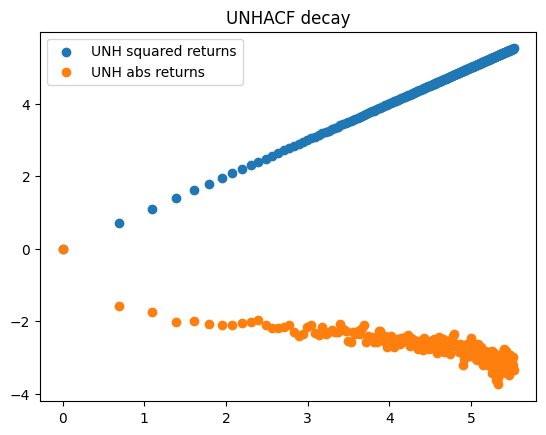

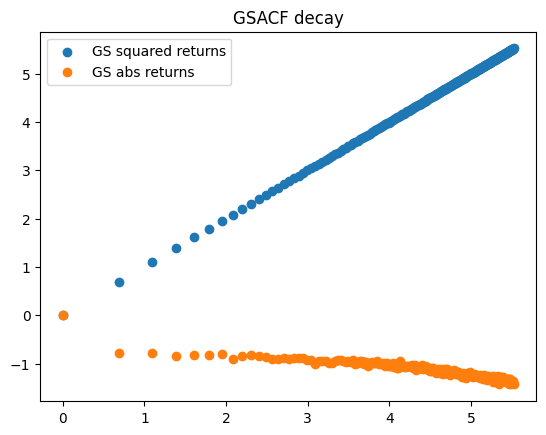

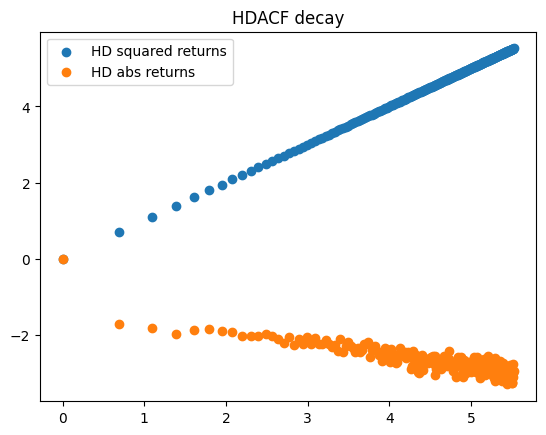

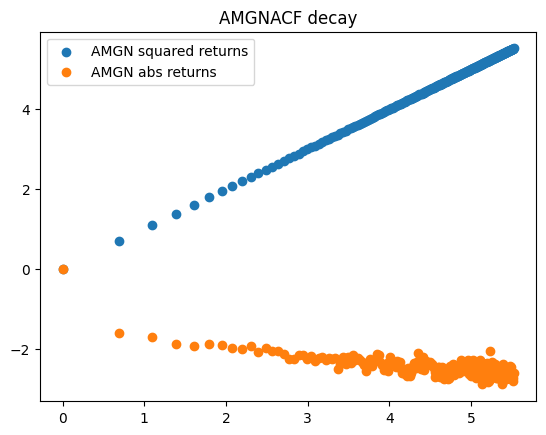

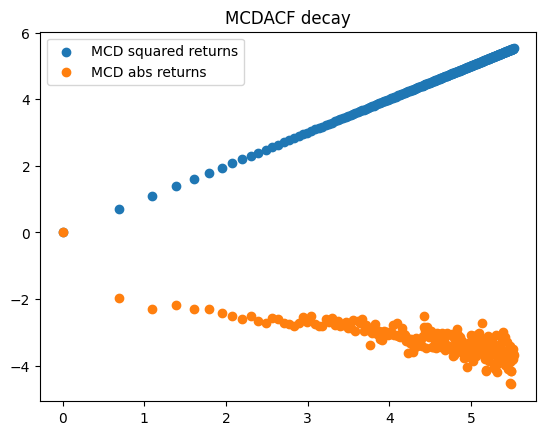

C:\Users\Nitai Nijholt\AppData\Local\Temp\ipykernel_27880\2180230213.py:10: RuntimeWarning: invalid value encountered in log
  y_abs = np.log(acf_abs_returns)


ValueError: x and y must be the same size

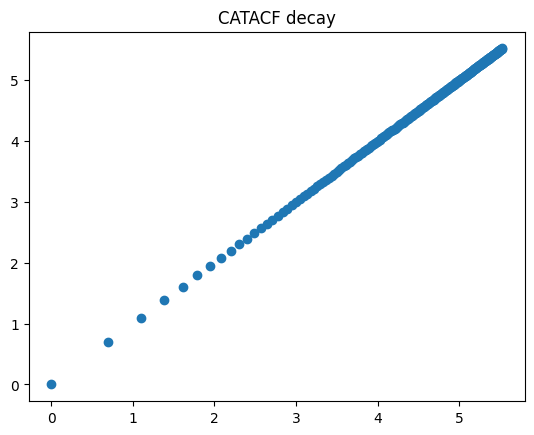

In [ ]:
# Plot the ACF v2.0
for stock in returns.columns:
    abs_returns = returns[stock].abs()
    squared_returns = np.square(returns[stock])
    acf_abs_returns = acf(abs_returns, nlags = 250)
    acf_squared_returns = acf(squared_returns, nlags = 250)
    x_abs = np.log(range(len(acf_abs_returns)))
    x_abs = x_abs[~np.isinf(x_abs)]
    x_abs = x_abs[~np.isnan(x_abs)]
    y_abs = np.log(acf_abs_returns)
    y_abs = y_abs[~np.isinf(y_abs)]
    y_abs = y_abs[~np.isnan(y_abs)][:-1]
    # model_abs = LinearRegression()
    # model_abs.fit(x_abs.reshape(-1, 1), y_abs.reshape(-1, 1))
    x_squared = np.log(range(len(acf_squared_returns))).reshape(-1, 1)
    x_squared = x_squared[~np.isinf(x_squared)]
    x_squared = x_squared[~np.isnan(x_squared)]
    y_squared = np.log(acf_squared_returns).reshape(-1, 1)
    y_squared = y_squared[~np.isinf(y_squared)]
    y_squared = x_squared[~np.isnan(x_squared)]
    # model_squared = LinearRegression()
    # model_squared.fit(x_squared.reshape(-1, 1),y_squared.reshape(-1, 1))

    # tupple = (model_abs.x , model_squared )
    # np.polyfit(x_squared, y_squared, 1)[0]
    # acf_decay_exponent_squared_return= np.polyfit(x_squared, y_squared, 1)[0]
    # exponent_abs_return = np.polyfit(acf_abs_returns, acf_squared_returns, 1)[0]
    plt.title(str(stock)+ 'ACF decay')
    plt.scatter(x_squared, y_squared, label = stock + ' squared returns')
    plt.scatter(x_abs, y_abs, label = stock + ' abs returns')
    plt.legend()
    plt.show()
# plt.show()

In [ ]:
# The following Hill estimator is from https://github.com/alinasode/hill-estimator/blob/main/utils/functions.py
# We use it by instead of giving it the whole dataset, we only give it the tail region we want it to calculate
# Since this function returns an np.array of different HE values for all the datapoint spots, we take the mean of this np.array 
def Hill_estimator(data):
    """
    Returns the Hill Estimators for some 1D data set.
    """    
    # sort data in such way that the smallest value is first and the largest value comes last:
    Y = np.sort(data)
    n = len(Y)

    Hill_est = np.zeros(n-1)

    for k in range(0, n-1):    # k = 0,...,n-2
        summ = 0

        for i in range(0,k+1):   # i = 0, ..., k
            summ += np.log(Y[n-1-i]) - np.log(Y[n-2-k])
        
        Hill_est[k] = (1 / (k+1)) * summ      # add 1 to k because of Python syntax
  
    kappa = 1. / Hill_est
    return kappa.mean()

data = np.array(acf_abs_returns)
data_sorted = acf_abs_returns.sort()
# The last number is the percentile of the tail we want to check
slicer = int(len(data)-len(data)*0.01)
data = data[int(slicer):len(data)]
HE = Hill_estimator(data)
HE.mean()

5.30355791489952